In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import cv2
from os import listdir
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
yes=listdir('DS4/yes')
no=listdir('DS4/no')


X =[]
for file in yes:
    img = cv2.imread('DS4/yes/'+file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    img = cv2.medianBlur(img, 5)
    img = cv2.resize(img, (64, 64) ) 
    img = cv2.Canny(img, 255, 255, 3, L2gradient=True)
    img = img.astype('uint8')
    X.append(img)
    
for file in no:
    img = cv2.imread('DS4/no/'+file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img, 5)
    img = cv2.resize(img, (64, 64) )
    img = cv2.Canny(img, 255, 255, 3, L2gradient=True)
    img = img.astype('uint8')
    X.append(img)
    
X = np.squeeze(X)
X = X.reshape(3253,64,64,1)

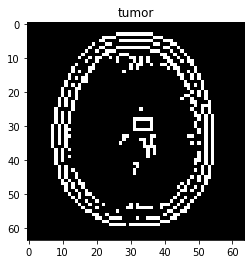

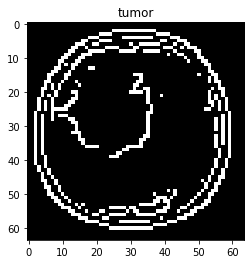

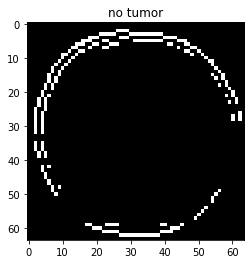

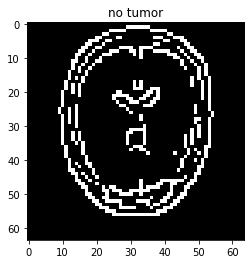

In [48]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('tumor')
plt.imshow(X[200], cmap='gray')
plt.show()
plt.figure()
plt.title('tumor')
plt.imshow(X[360], cmap='gray')
plt.show()

plt.title('no tumor')
plt.imshow(X[2100], cmap='gray')
plt.show()
plt.figure()
plt.title('no tumor')
plt.imshow(X[2200], cmap='gray')
plt.show()


In [4]:
yes=listdir('DS4/yes')
no=listdir('DS4/no')

y1=np.full(len(yes),1)
y0=np.full(len(no),0)
Y=np.concatenate([y1,y0])

from keras.utils.np_utils import to_categorical
Y = to_categorical(Y, num_classes = 2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

Using TensorFlow backend.


In [29]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=9, padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))
#model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
 

model.add(tf.keras.layers.Dense(2, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 128)       10496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        663616    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])
model.fit(X_train,
         y_train,
         batch_size=512,
         epochs=1000,
         validation_data=(X_test, y_test))
model.save('cnn_sav.h5')


Train on 2927 samples, validate on 326 samples
Epoch 1/1000
2927/2927 [==============================] - 2s 741us/sample - loss: 0.8375 - acc: 0.5056 - val_loss: 0.6919 - val_acc: 0.5613
Epoch 2/1000
2927/2927 [==============================] - 1s 505us/sample - loss: 0.6935 - acc: 0.4998 - val_loss: 0.6916 - val_acc: 0.5613
Epoch 3/1000
2927/2927 [==============================] - 1s 500us/sample - loss: 0.6929 - acc: 0.5159 - val_loss: 0.6920 - val_acc: 0.5675
Epoch 4/1000
2927/2927 [==============================] - 1s 498us/sample - loss: 0.6919 - acc: 0.5381 - val_loss: 0.6896 - val_acc: 0.6687
Epoch 5/1000
2927/2927 [==============================] - 1s 493us/sample - loss: 0.6862 - acc: 0.5859 - val_loss: 0.6674 - val_acc: 0.6503
Epoch 6/1000
2927/2927 [==============================] - 1s 497us/sample - loss: 0.6432 - acc: 0.6406 - val_loss: 0.5498 - val_acc: 0.7577
Epoch 7/1000
2927/2927 [==============================] - 1s 494us/sample - loss: 0.5920 - acc: 0.6990 - val_loss

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

y_pred = model.predict(X_test)
y_hat = model.predict(X_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
print(classification_report(y_test, yr))


 Test accuracy: 0.9815951
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.97      0.99      0.98       183

   micro avg       0.98      0.98      0.98       326
   macro avg       0.98      0.98      0.98       326
weighted avg       0.98      0.98      0.98       326
 samples avg       0.98      0.98      0.98       326



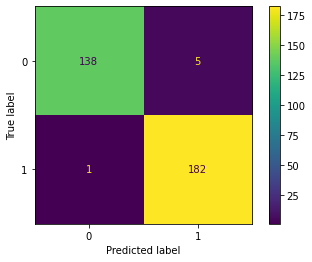

In [41]:
y_test

ypred1d = []

for i in yr:
    if i[0] > i[1]:
        ypred1d.append(0)
    else:
        ypred1d.append(1) 

ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest1d, ypred1d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [5]:
from tensorflow.keras.models import Model,load_model
model = load_model('cnn_sav.h5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 128)       10496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
co

In [158]:
dense_l = Model(inputs=model.input,outputs=model.get_layer('flatten_3').output)

densefeatures_train = dense_l.predict(X_train)
print(densefeatures_train.shape)

densefeatures_test = dense_l.predict(X_test)
print(densefeatures_test.shape)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( criterion='gini',verbose=10,max_features='sqrt',n_jobs=4)
#clf = clf.fit(densefeatures_train,np.argmax(y_train,axis=1))
#print(clf.score(densefeatures_test,np.argmax(y_test,axis=1)))

#import joblib
#filename = 'test_RF_dip_rev3-rf-9907acc.sav'
#joblib.dump(clf, filename)


(2927, 16)
(326, 16)
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100building tree 23 of 100
building tree 24 of 100

building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100building tree 34 of 100

building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100build

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished



building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100building tree 91 of 100

building tree 92 of 100building tree 93 of 100

building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
0.99079754601227


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


['test_RF_dip_rev3-rf-9907acc.sav']

In [153]:
import joblib
filename = 'rf_sav.sav'
joblib.dump(clf, filename)


['dip_rev3-rf-9907acc.sav']

In [57]:
import joblib
filename = 'rf_sav.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(densefeatures_test,np.argmax(y_test,axis=1))
print('\n', 'Test accuracy:', result)


 Test accuracy: 0.99079754601227


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99       183

    accuracy                           0.99       326
   macro avg       0.99      0.99      0.99       326
weighted avg       0.99      0.99      0.99       326



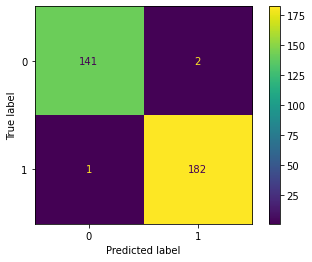

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = loaded_model.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


(2927, 16)
(326, 16)
0.9754601226993865
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       143
           1       0.96      0.99      0.98       183

    accuracy                           0.98       326
   macro avg       0.98      0.97      0.97       326
weighted avg       0.98      0.98      0.98       326



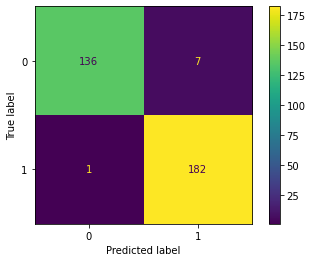

In [7]:
dense_l = Model(inputs=model.input,outputs=model.get_layer('flatten_3').output)

densefeatures_train = dense_l.predict(X_train)
print(densefeatures_train.shape)

densefeatures_test = dense_l.predict(X_test)
print(densefeatures_test.shape)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(reg.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = reg.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


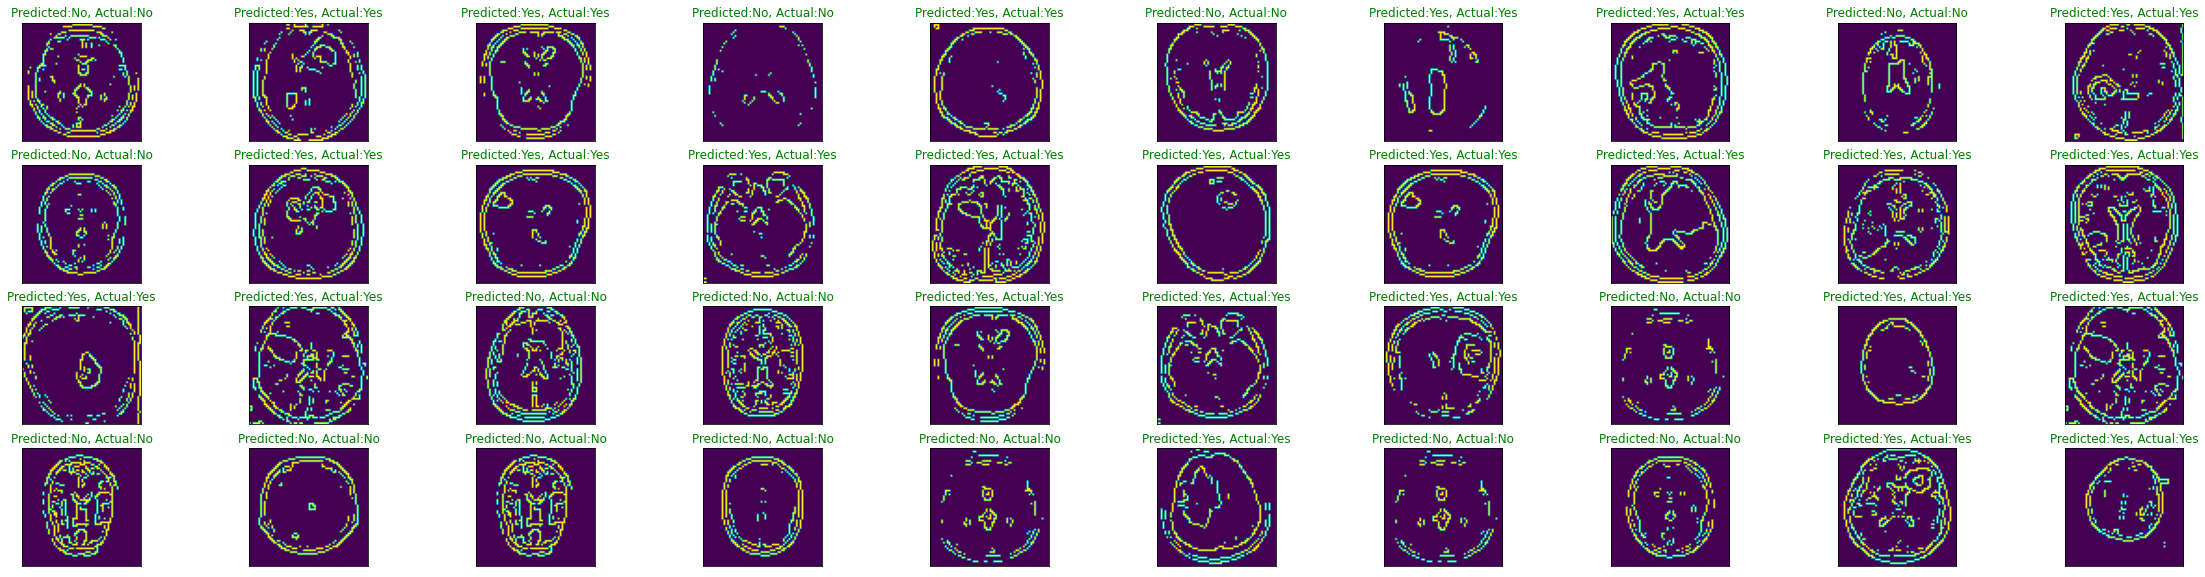

In [8]:
from numpy.random import seed
from numpy.random import randint
from tensorflow.keras.models import Model,load_model
arr=[]


for z in range(len(yr)):
    arr.append(int(yr[z]))

labels =["No",  # index 0
        "Yes",      # index 1
        ]

figure = plt.figure(figsize=(40, 10))
values = randint(1, 161, 40)
for i in range(40):
    ax = figure.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[values[i]]))   
    # Set the title for each image
    ax.set_title("Predicted:{}, Actual:{}".format(labels[arr[values[i]]], 
                                  labels[ytest1d[values[i]]]),
                                  color=("green" if arr[values[i]] == ytest1d[values[i]] else "red"))
plt.show()
 

0.9754601226993865
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       143
           1       0.96      0.99      0.98       183

    accuracy                           0.98       326
   macro avg       0.98      0.97      0.97       326
weighted avg       0.98      0.98      0.98       326



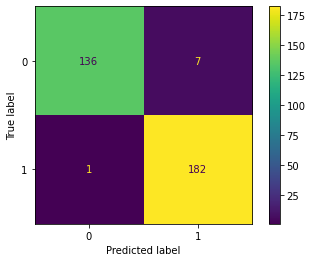

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(knn.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = knn.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



0.9846625766871165
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.98      0.99      0.99       183

    accuracy                           0.98       326
   macro avg       0.99      0.98      0.98       326
weighted avg       0.98      0.98      0.98       326



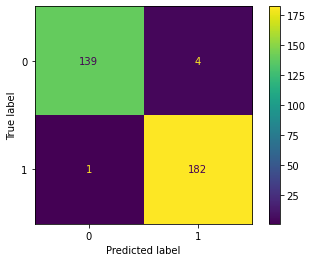

In [10]:

from sklearn.naive_bayes import ComplementNB
gnb = ComplementNB(alpha=0)
gnb.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(gnb.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = gnb.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))

cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



0.9601226993865031
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       143
           1       0.94      0.99      0.97       183

    accuracy                           0.96       326
   macro avg       0.97      0.96      0.96       326
weighted avg       0.96      0.96      0.96       326



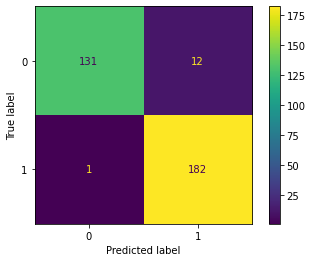

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(svm.score(densefeatures_test,np.argmax(y_test,axis=1)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = svm.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))
cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



0.99079754601227
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99       183

    accuracy                           0.99       326
   macro avg       0.99      0.99      0.99       326
weighted avg       0.99      0.99      0.99       326



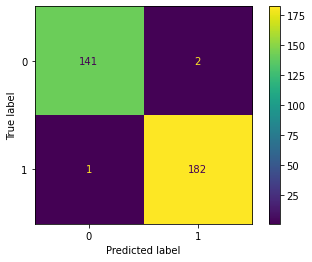

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.001,max_depth=18, random_state=0)
clf = clf.fit(densefeatures_train,np.argmax(y_train,axis=1))
print(clf.score(densefeatures_test,np.argmax(y_test,axis=1)))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = clf.predict(densefeatures_test)
yr=np.around(y_hat)
from sklearn.metrics import classification_report
ytest1d = []
for i in y_test:
    if i[0] > i[1]:
        ytest1d.append(0)
    else:
        ytest1d.append(1)

print(classification_report(ytest1d, yr))
cm = confusion_matrix(ytest1d, yr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()